### Задание

Создайте систему компьютерного зрения, которая будет определять тип геометрической фигуры. Используя подготовленную базу и шаблон ноутбука проведите серию экспериментов по перебору гиперпараметров нейронной сети, распознающей три категории изображений (треугольник, круг, квадрат).

1. Поменяйте количество нейронов в сети, используя следующие значения:

- один слой 10 нейронов
- один слой 100 нейронов
- один слой 5000 нейронов.

2. Поменяйте активационную функцию в скрытых слоях с `relu` на `linear`.
3. Поменяйте размеры batch_size:
- 10
- 100
- 1000

4. Выведите на экран получившиеся точности.

Всего должно получиться 18 комбинаций указанных параметров.

Создайте сравнительную таблицу по результатам проведенных тестов.

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# Вывод изображения в ноутбуке, а не в консоли или файле
%matplotlib inline


In [ ]:
# Загрузка датасета из облака
import gdown
gdown.download('https://storage.yandexcloud.net/aiueducation/Content/base/l3/hw_light.zip', None, quiet=True)

'hw_light.zip'

In [ ]:
# Распаковываем архив hw_light.zip в папку hw_light
!unzip -q hw_light.zip

In [ ]:
# Путь к директории с базой
base_dir = '/content/hw_light'
# Создание пустого списка для загрузки изображений обучающей выборки
x_train = []
# Создание списка для меток классов
y_train = []
# Задание высоты и ширины загружаемых изображений
img_height = 20
img_width = 20
# Перебор папок в директории базы
for patch in os.listdir(base_dir):
    # Перебор файлов в папках
    for img in os.listdir(base_dir + '/' + patch):
        # Добавление в список изображений текущей картинки
        x_train.append(image.img_to_array(image.load_img(base_dir + '/' + patch + '/' + img,
                                                    target_size=(img_height, img_width),
                                                    color_mode='grayscale')))
        # Добавление в массив меток, соответствующих классам
        if patch == '0':
            y_train.append(0)
        elif patch == '3':
            y_train.append(1)
        else:
            y_train.append(2)

# Преобразование в numpy-массив загруженных изображений и меток классов
x_train_org = np.array(x_train)
y_train_org = np.array(y_train)

# Вывод размерностей
print('Размер массива x_train_org', x_train_org.shape)
print('Размер массива y_train_org', y_train_org.shape)

Размер массива x_train_org (302, 20, 20, 1)
Размер массива y_train_org (302,)


In [ ]:
x_train_org, x_test_org, y_train_org, y_test_org = train_test_split(x_train_org, y_train_org, test_size=0.2, random_state=42)

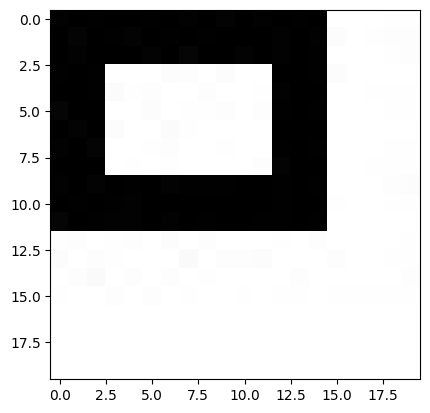

In [ ]:
# Отрисовка картинки
plt.imshow(x_train_org[12], cmap='gray')

# Вывод n-й картинки
plt.show()

In [ ]:
# Вывод метки класса для n-го изображения
print(y_train_org[12])

2


In [ ]:
x_train = x_train_org.reshape(x_train_org.shape[0], -1)
x_test = x_test_org.reshape(x_test_org.shape[0], -1)

# Проверка результата
print(f'Форма обучающих данных: {x_train_org.shape} -> {x_train.shape}')
print(f'Форма  тестовых данных: {x_test_org.shape} -> {x_test.shape}')

Форма обучающих данных: (241, 20, 20, 1) -> (241, 400)
Форма  тестовых данных: (61, 20, 20, 1) -> (61, 400)


In [ ]:
# Нормализация входных картинок
# Преобразование x_train в тип float32 (числа с плавающей точкой) и нормализация
x_train = x_train.astype('float32') / 255.

# Преобразование x_test в тип float32 (числа с плавающей точкой) и нормализация
x_test = x_test.astype('float32') / 255.

In [ ]:
CLASS_COUNT = 3

# Преобразование ответов в формат one_hot_encoding
y_train = keras.utils.to_categorical(y_train_org, CLASS_COUNT)
y_test = keras.utils.to_categorical(y_test_org, CLASS_COUNT)

print(y_train.shape)

# Вывод примера одного выходного вектора
print(y_train[0])

(241, 3)
[1. 0. 0.]


In [ ]:
neurons_list = [10, 100, 5000]
activations = ['relu', 'linear']
batch_sizes = [10, 100, 1000]

In [ ]:
# Сохранение результатов
results = []

# Перебор всех комбинаций
for neurons in neurons_list:
    for activation in activations:
        for batch_size in batch_sizes:
            # Создание модели
            model = models.Sequential([
                layers.Dense(neurons, activation=activation, input_shape=(img_height * img_width,)),
                layers.Dense(3, activation='softmax')
            ])

            # Компиляция
            model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

            # Обучение
            history = model.fit(x_train, y_train, epochs=10, batch_size=batch_size, verbose=0, validation_data=(x_test, y_test))

            # Оценка модели
            test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

            # Вывод результатов
            print(f'Нейронов: {neurons}, Активация: {activation}, Batch size: {batch_size} → Точность: {test_acc:.4f}')
            results.append((neurons, activation, batch_size, test_acc))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Нейронов: 10, Активация: relu, Batch size: 10 → Точность: 0.7705
Нейронов: 10, Активация: relu, Batch size: 100 → Точность: 0.6557
Нейронов: 10, Активация: relu, Batch size: 1000 → Точность: 0.3770
Нейронов: 10, Активация: linear, Batch size: 10 → Точность: 0.6230
Нейронов: 10, Активация: linear, Batch size: 100 → Точность: 0.6557
Нейронов: 10, Активация: linear, Batch size: 1000 → Точность: 0.6721
Нейронов: 100, Активация: relu, Batch size: 10 → Точность: 0.7377
Нейронов: 100, Активация: relu, Batch size: 100 → Точность: 0.7869
Нейронов: 100, Активация: relu, Batch size: 1000 → Точность: 0.6230
Нейронов: 100, Активация: linear, Batch size: 10 → Точность: 0.7541
Нейронов: 100, Активация: linear, Batch size: 100 → Точность: 0.7213
Нейронов: 100, Активация: linear, Batch size: 1000 → Точность: 0.6393
Нейронов: 5000, Активация: relu, Batch size: 10 → Точность: 0.7869
Нейронов: 5000, Активация: relu, Batch size: 100 → Точность: 0.7213
Нейронов: 5000, Активация: relu, Batch size: 1000 → Точ

In [ ]:
# Сортировка результатов по точности
results.sort(key=lambda x: x[3], reverse=True)

# Вывод лучших параметров
print("\nТоп-5 лучших комбинаций:")
for r in results[:5]:
    print(f'Нейронов: {r[0]}, Активация: {r[1]}, Batch size: {r[2]} → Точность: {r[3]:.4f}')


Топ-5 лучших комбинаций:
Нейронов: 100, Активация: relu, Batch size: 100 → Точность: 0.7869
Нейронов: 5000, Активация: relu, Batch size: 10 → Точность: 0.7869
Нейронов: 10, Активация: relu, Batch size: 10 → Точность: 0.7705
Нейронов: 100, Активация: linear, Batch size: 10 → Точность: 0.7541
Нейронов: 100, Активация: relu, Batch size: 10 → Точность: 0.7377


In [ ]:
model = models.Sequential([
                layers.Dense(100, activation='relu', input_shape=(img_height * img_width,)),
                layers.Dense(3, activation='softmax')
            ])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=0, validation_data=(x_test, y_test))
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

print(f'Нейронов: 100, Активация: relu, Batch size: 100 → Точность: {test_acc:.4f}')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Нейронов: 100, Активация: relu, Batch size: 100 → Точность: 0.7541


In [ ]:
model.save_weights('model.weights.h5')
model.load_weights('model.weights.h5')

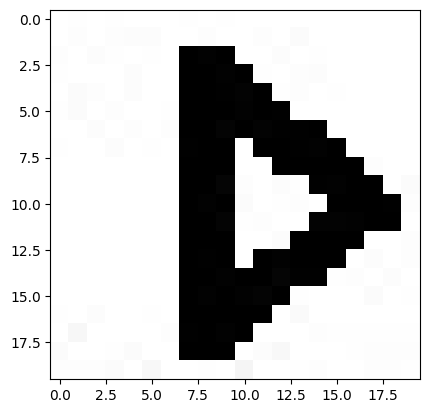

In [ ]:
# Номер тестовой цифры, которую будем распознавать
n_rec = np.random.randint(x_test_org.shape[0])

# Отображение картинки из тестового набора под номером n_rec
plt.imshow(x_test_org[n_rec], cmap='gray')
plt.show()

In [ ]:
# Выбор нужной картинки из тестовой выборки
x = x_test[n_rec]

# Проверка формы данных
print(x.shape)

(400,)


In [ ]:
# Добавление одной оси в начале, чтобы нейронка могла распознать пример
# Массив из одного примера, так как нейронка принимает именно массивы примеров (батчи) для распознавания
x = np.expand_dims(x, axis=0)

# Проверка формы данных
print(x.shape)

(1, 400)


In [ ]:
# Распознавание примера
prediction = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


In [ ]:
# Вывод результата
print(prediction)

[[0.33698556 0.6259294  0.03708495]]


In [ ]:
# Получение и вывод индекса самого большого элемента
print(f'Распознана фигура: {pred}')

Распознана фигура: 1


In [ ]:
# Вывод правильного ответа для сравнения
print(y_test_org[n_rec])

1
